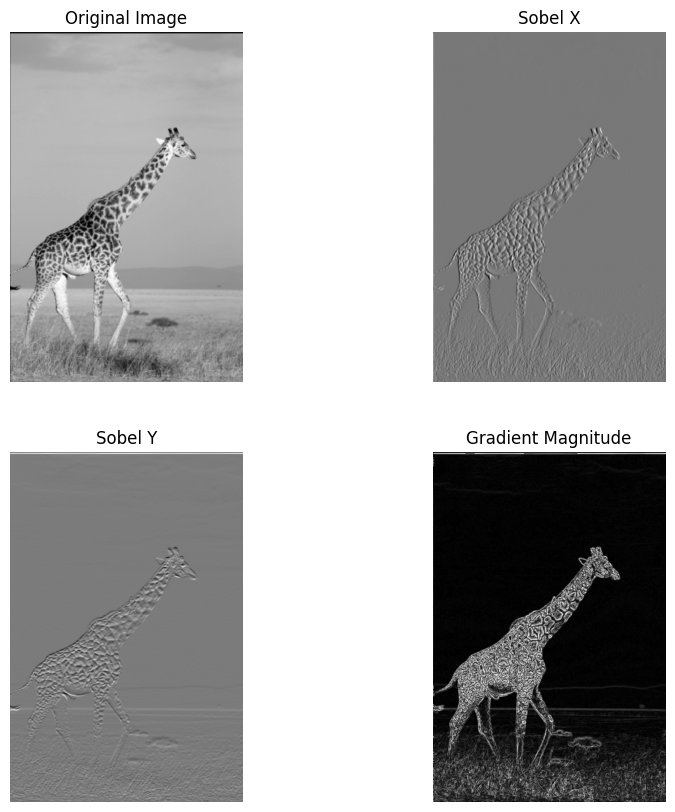

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/Animal.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_magnitude = np.uint8(gradient_magnitude)


plt.figure(figsize=(10, 10))


plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Sobel X')
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Sobel Y')
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')

plt.show()


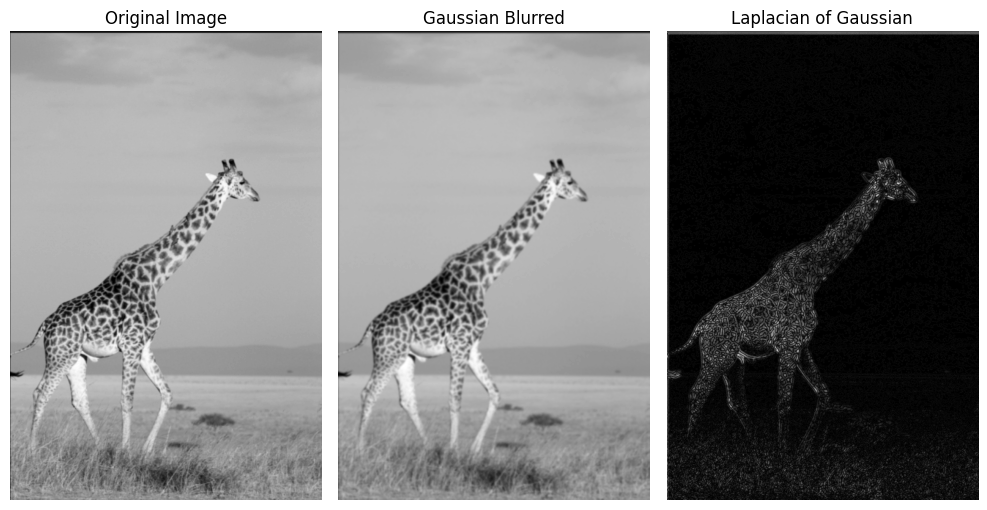

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/Animal.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

sigma = 1.0
gaussian_blurred = cv2.GaussianBlur(image, (0, 0), sigma)

laplacian = cv2.Laplacian(gaussian_blurred, cv2.CV_64F)

laplacian = np.uint8(np.absolute(laplacian))

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Gaussian Blurred')
plt.imshow(gaussian_blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Laplacian of Gaussian')
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Saving Animal.png to Animal (1).png


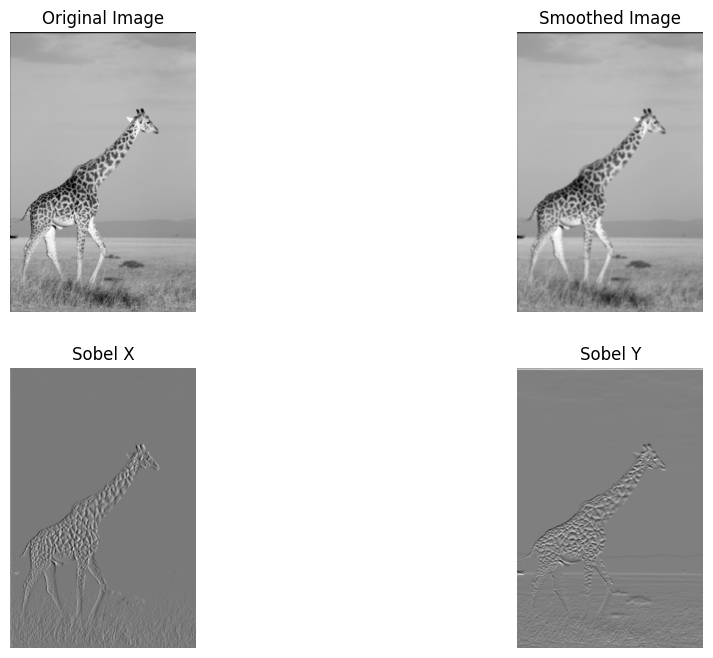

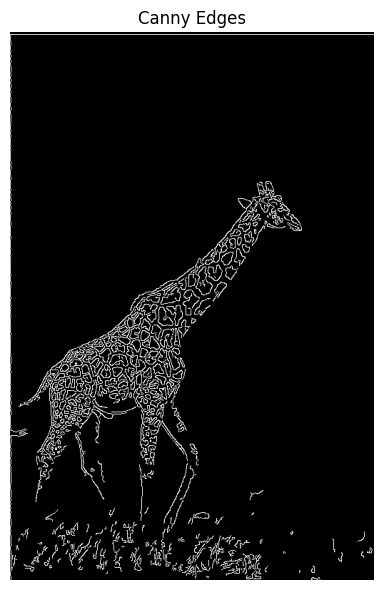

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image_color = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

kernel = np.ones((5, 5), np.float32) / 25
smoothed = cv2.filter2D(image, -1, kernel)

sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

edges = cv2.Canny(image, 100, 200)
image_color_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Smoothed Image')
plt.imshow(smoothed, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Sobel X')
plt.imshow(sobelx, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Sobel Y')
plt.imshow(sobely, cmap='gray')
plt.axis('off')

plt.figure(figsize=(6, 6))
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



Saving Animal.png to Animal (2).png


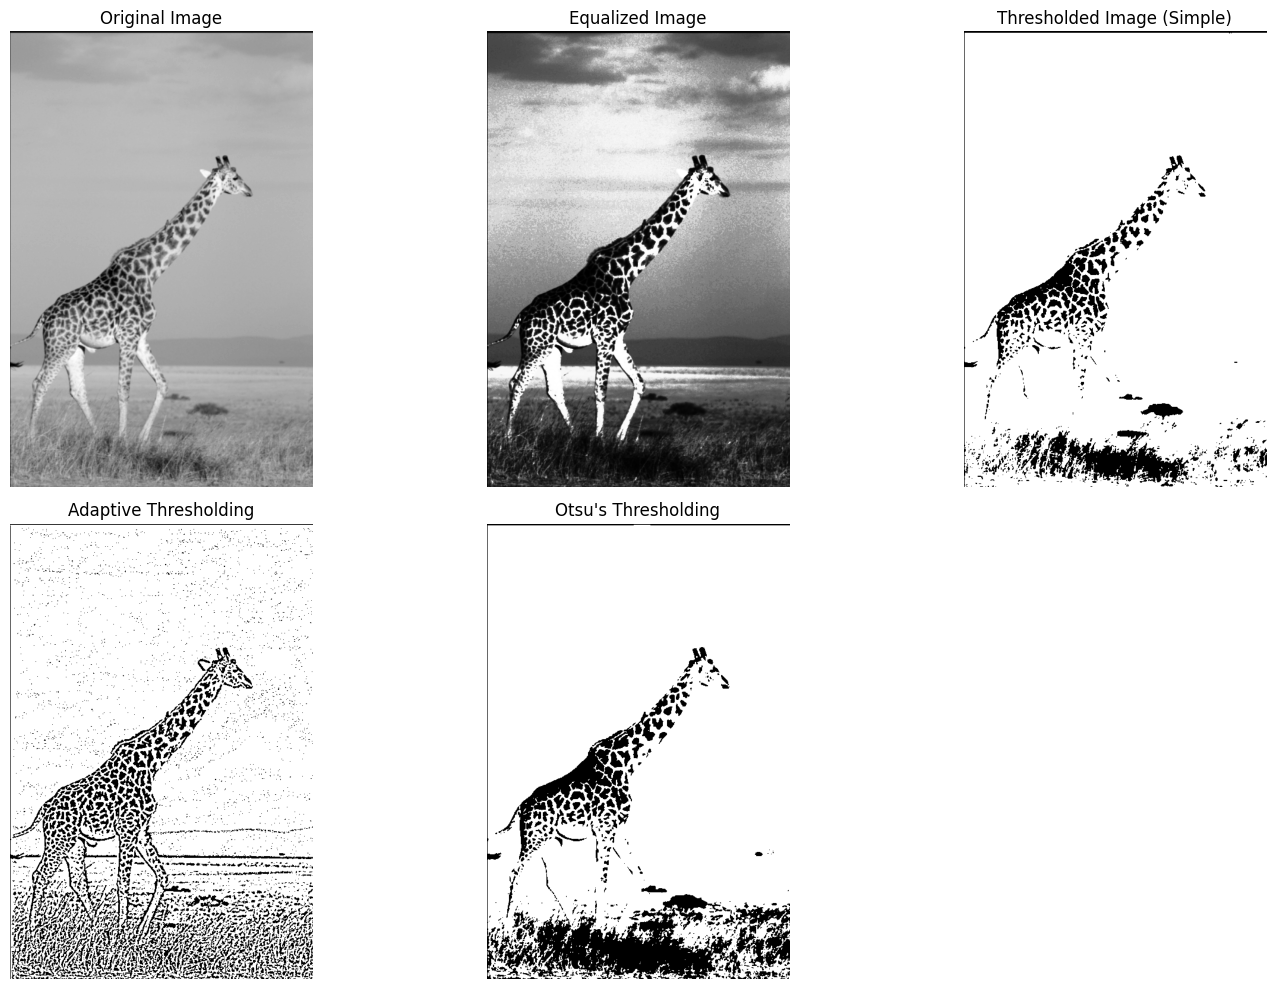

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

equalized_img = cv2.equalizeHist(img)

_, thresholded_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

adaptive_thresh_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)
_, otsu_thresh_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Equalized Image')
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Thresholded Image (Simple)')
plt.imshow(thresholded_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Adaptive Thresholding')
plt.imshow(adaptive_thresh_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Otsu\'s Thresholding')
plt.imshow(otsu_thresh_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Mean Squared Error: 98350.68311505383
R-squared: 0.04736219113133644


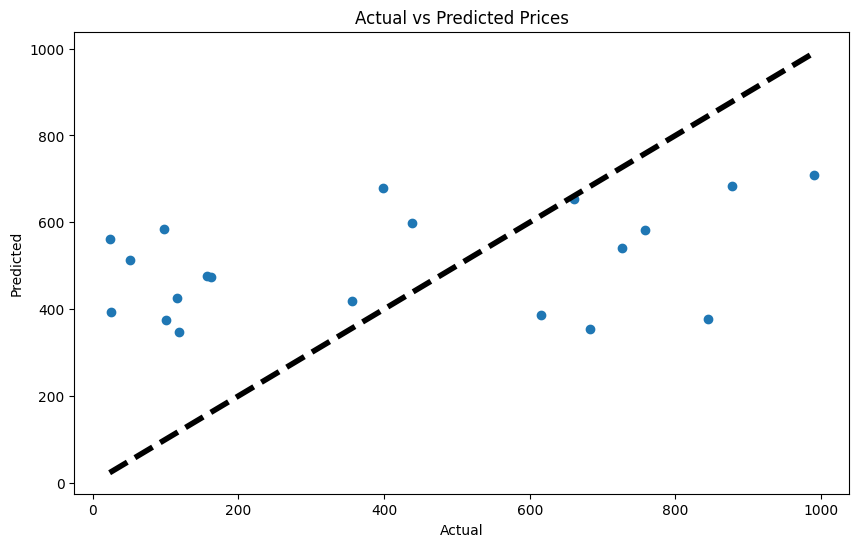

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
num_samples = 100
data = pd.DataFrame({
    'Feature1': np.random.rand(num_samples) * 100,
    'Feature2': np.random.rand(num_samples) * 200,
    'Feature3': np.random.rand(num_samples) * 300,
    'Price': np.random.rand(num_samples) * 1000
})
target_column = 'Price'
X = data.drop(target_column, axis=1)
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()





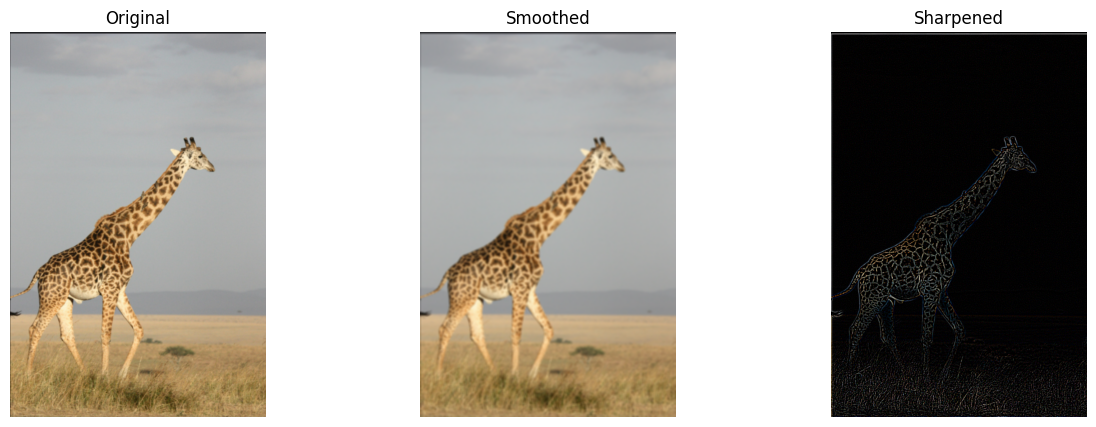

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/Animal.png', cv2.IMREAD_COLOR)

kernel_smooth = np.ones((5,5),np.float32)/25
smoothed = cv2.filter2D(image, -1, kernel_smooth)

kernel_sharpen = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
sharpened = cv2.filter2D(image, -1, kernel_sharpen)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
smoothed_rgb = cv2.cvtColor(smoothed, cv2.COLOR_BGR2RGB)
sharpened_rgb = cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Smoothed')
plt.imshow(smoothed_rgb)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Sharpened')
plt.imshow(sharpened_rgb)
plt.axis('off')

plt.show()
